In [150]:
#Importing necessary packages
import math 
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial

In [151]:
#Read data frame
df = pd.read_csv(r'/home/radhika/Portfolio/poll.csv')

In [152]:
#Collect important information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [153]:
#Show first 5 rows
df.head()

,vote
0,BJP
1,INC
2,BJP
3,BJP
4,BJP


In [154]:
#Count values
df.vote.value_counts()

BJP    511
INC    489
Name: vote, dtype: int64

In [155]:
#Normalise counted values
df.vote.value_counts(normalize = True)


BJP    0.511
INC    0.489
Name: vote, dtype: float64

In [156]:
#Define a function to create another sample 
def sample (BJPcount, n):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < BJPcount, 'BJP', 'INC')}) 

In [157]:
s = sample(0.51, 1000)

In [158]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [159]:
s

,vote
0,BJP
1,INC
2,INC
3,BJP
4,BJP
...,...
995,INC
996,INC
997,INC
998,BJP


In [160]:
s.head()

,vote
0,BJP
1,INC
2,INC
3,BJP
4,BJP


In [161]:
s.vote.value_counts(normalize=True)

INC    0.523
BJP    0.477
Name: vote, dtype: float64

In [162]:
dist = pd.DataFrame([sample(0.51, 1000).vote.value_counts(normalize=True) for i in range(1000)])

In [163]:
dist.head()

,BJP,INC
vote,0.532,0.468
vote,0.526,0.474
vote,0.510,0.490
vote,0.515,0.485
vote,0.502,0.498


<AxesSubplot:>

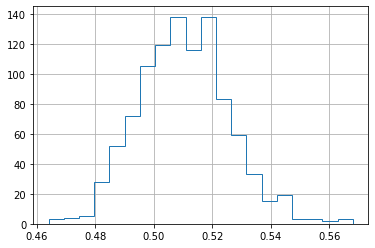

In [164]:
dist.BJP.hist(histtype='step', bins=20)

In [165]:
def samplingdist(BJP, n=1000):
        return pd.DataFrame(sample(BJP, n).vote.value_counts(normalize=True) for i in range(1000))

In [166]:
def quantiles(BJP, n=1000):
    dist = samplingdist(BJP, n)
    return dist.BJP.quantile(0.025), dist.BJP.quantile(0.975)

In [167]:
quantiles(0.50)

(0.469, 0.532)

In [168]:
quantiles(0.48)

(0.448, 0.512)

In [169]:
quantiles(0.54)

(0.507, 0.569)

In [170]:
dist = samplingdist(0.50, 10000)

<AxesSubplot:>

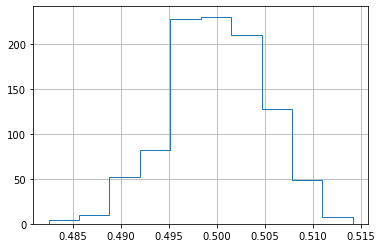

In [171]:
dist.BJP.hist(histtype='step')

In [172]:
largepoll = pd.read_csv('large-poll.csv')

In [173]:
largepoll.vote.value_counts(normalize=True)

INC    0.5181
BJP    0.4819
Name: vote, dtype: float64

In [174]:
dist = pd.DataFrame(sample(0.50,10000).vote.value_counts(normalize=True) for i  in range(1000))

<AxesSubplot:>

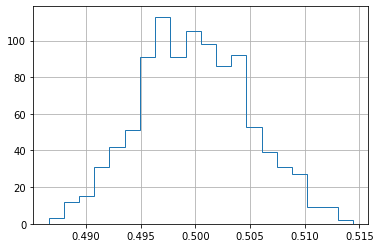

In [175]:
dist.INC.hist(histtype='step',bins=20)